In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tqdm import tqdm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [1]:
from dataset_creation import *

## Some correlation
Supponiamo di star lavorando con un ospedale e vogliamo predirre se i pazienti avranno un ictus, e abbiamo un dataset dei pazienti li dentro e vogliamo vedere se il dataset è abbastanza buono per predirre l'icuts si o no, secondo delle linee guida date dai medici:

https://www.medicapoliambulatori.it/news/ictus-tipi-cause-sintomi/

https://www.humanitas.it/malattie/ictus-cerebrale/
Infatti il 75% dei casi di ICTUS colpisce le persone con più di 65 anni.

L’incidenza è proporzionale all’età della popolazione: è bassa fino a 40-45 anni, poi aumenta gradualmente per impennarsi dopo i 70 anni.

Tra i fattori di rischio non modificabili:

età; sesso;

malattie cardiache

obesità

ipertensione arteriosa

In [5]:
def plot_color(values, size=(30,5), coef=1):
    
    my_cmap = plt.get_cmap('copper')
    my_norm = plt.Normalize(vmin=0, vmax=max(values)*coef)
    colormap=my_cmap(my_norm(values))
    
    return colormap

La prima cosa che abbiamo notato nel dataset era la presenza di alcuni valori NaN sulla colonna del bmi. We decide to fill those values with the mean of the bmi of our dataset.

La seconda cosa che abbiamo notato del dataset era la poca quantità di stroke rispetto al totale. Per essere sicuri quindi che questo dataset fosse adatto alle nostre analisi abbiamo controllato se i dati rispecchiassero le analisi cliniche e gli studi sugli stroke.
Dai dati raccolti dal sito del [ministero dell salute italiana](https://www.salute.gov.it/portale/salute/p1_5.jsp?id=28&area=Malattie_cardiovascolari), sappiamo che L’ictus è più frequente dopo i 55 anni, la sua prevalenza raddoppia successivamente ad ogni decade; il 75% degli ictus si verifica nelle persone con più di 65 anni. We also know that body-mass index is a risk factor with the avarange glucose level.

### mostrare scatterplot



Ictus emorragico rappresenta circa il 3%-5% di tutti gli ictus). L’ipertensione è quasi sempre la causa di questa forma gravissima di ictus.

### mostrare grafico ipertensione


#### fonti:

https://jamanetwork.com/journals/jamainternalmedicine/fullarticle/754810
https://www.medicapoliambulatori.it/news/ictus-tipi-cause-sintomi/

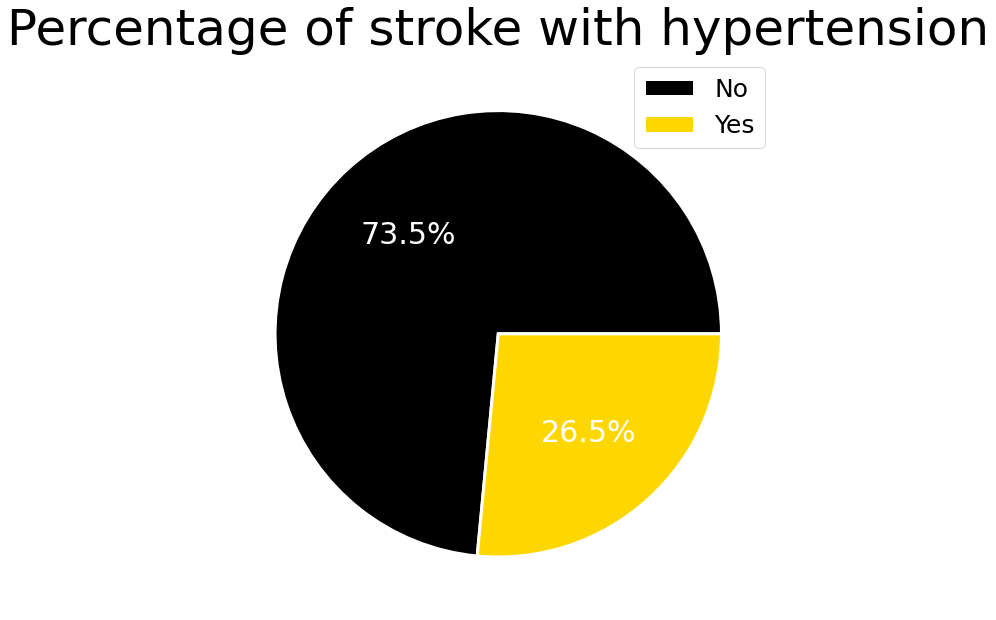

In [8]:
fig, ax = plt.subplots(figsize=(10, 20))



ax.pie(dataset[["hypertension", "stroke", "id"]][dataset.stroke == 1].groupby("hypertension").count()["id"], labels = ["No", "Yes"], 
       colors=["k","gold"], autopct='%1.1f%%', textprops={'size': 30, "color": "w"}, labeldistance=None, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'});
ax.set_title("Percentage of stroke with hypertension", fontsize=50);


ax.legend(fontsize = 25)
fig.savefig("immages/hypertension_pie.png", bbox_inches='tight', transparent = True)

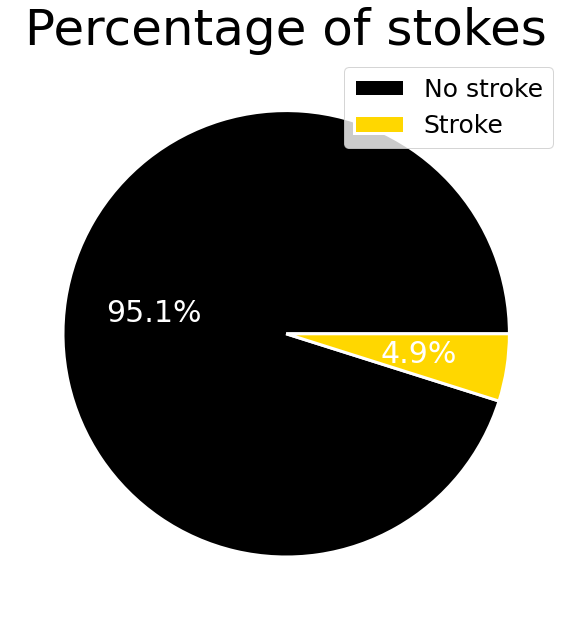

In [108]:
fig, ax = plt.subplots(figsize=(10, 20))

ax.pie(dataset.groupby("stroke").count()["id"], labels = ["No stroke", "Stroke"], 
       colors=["k","gold"], autopct='%1.1f%%', textprops={'size': 30, "color": "w"}, labeldistance=None, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'});
ax.set_title("Percentage of stokes", fontsize=50);
ax.legend(fontsize = 25)
fig.savefig("immages/stroke_pie.png", bbox_inches='tight', transparent = True)

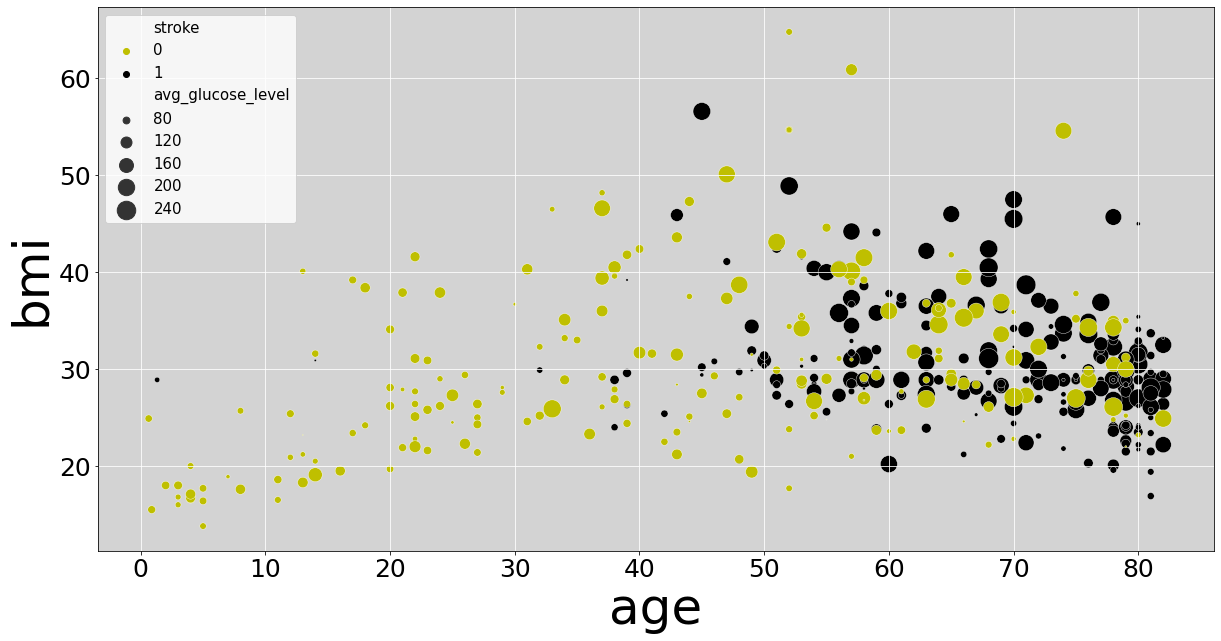

In [128]:
fig, ax = plt.subplots(figsize=(20,10))

stroke1 = dataset[dataset['stroke'] == 1].head(249).copy()
stroke0 = dataset[dataset['stroke'] == 0].head(200).copy()
strokee = pd.concat([stroke1, stroke0])

sns.scatterplot(x = strokee.age, y = strokee.bmi, size=strokee.avg_glucose_level, sizes=(1,400), hue = strokee.stroke, palette = ["y", "k"], ax=ax)


plt.xlabel('age', size = 50)
plt.ylabel('bmi', size = 50);
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.legend(fontsize=15, facecolor = "w")
plt.grid(color = "w")

fig.savefig("immages/scatter.png", bbox_inches='tight')

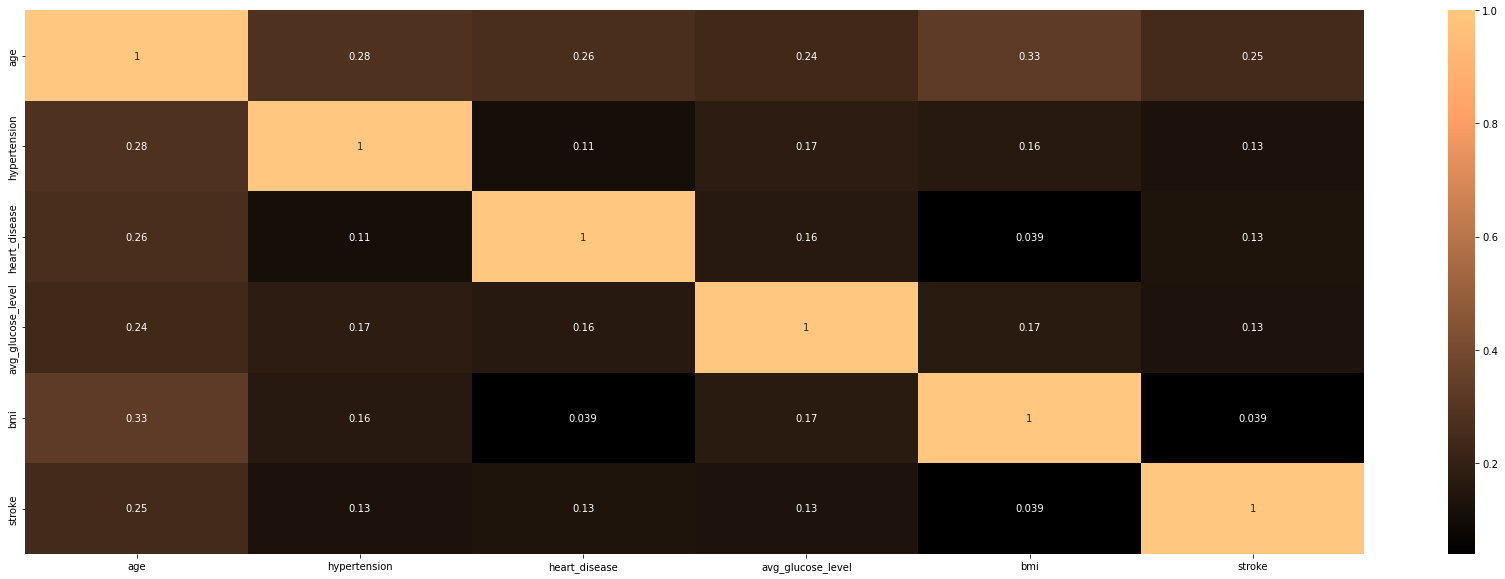

In [16]:
plt.figure(figsize=(30,10))
sns.heatmap(dataset[dataset.columns[1:]].corr(), cmap= "copper", annot=True);

In [17]:
dataset[dataset.columns[1:]].corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


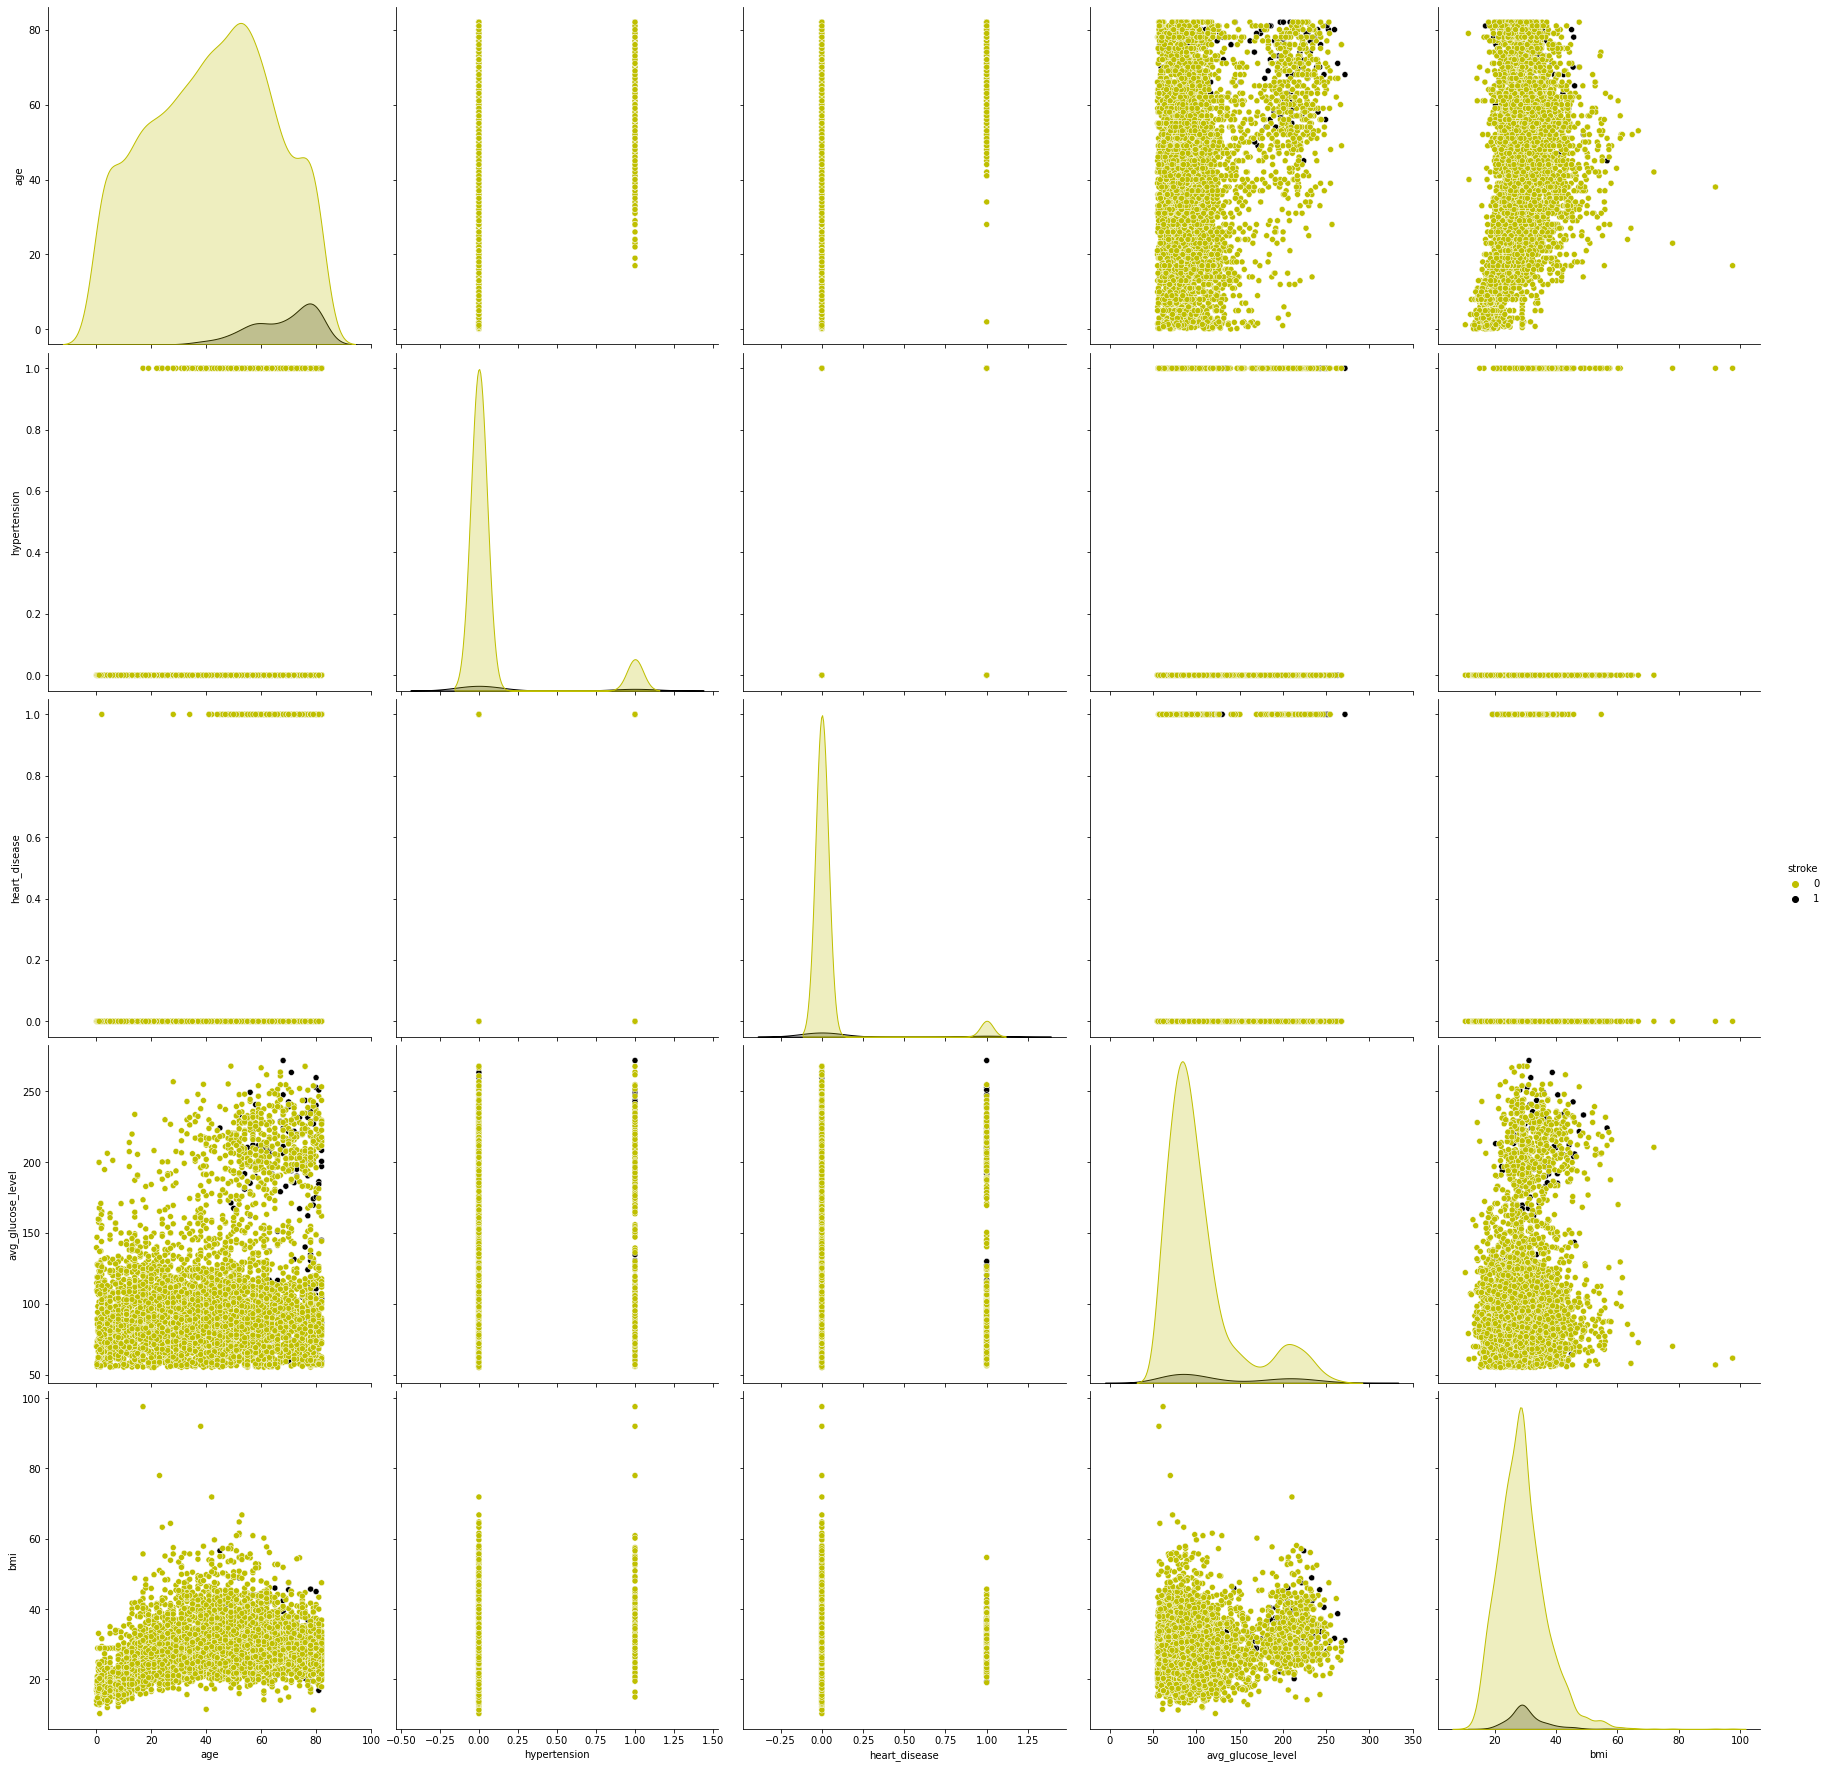

In [18]:
sns.pairplot(dataset[dataset.columns[1:]], hue="stroke", height=5, palette=["y","k"]);

In [20]:
df = dataset.copy()

Residence type, ever_married and gender are one hot encoder 0/1, no need to double the columns

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
clf = LogisticRegression(solver="liblinear")

In [ ]:
clf.fit(X_train, y_train)
y_LR = clf.predict(X_test)

In [ ]:
mat = confusion_matrix(y_test, y_LR)

sns.set(font_scale=1.5) 
sns.heatmap(mat, square = True, annot=True, cbar=False, fmt="d")
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
accuracy_score(y_test, y_LR)

In [ ]:
y_LR

# NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
y_pred = clf.fit(X_train, y_train)
y_MNB = clf.predict(X_test)

mat = confusion_matrix(y_test, y_MNB)

sns.set(font_scale=1.5) 
sns.heatmap(mat, square = True, annot=True, cbar=False, fmt="d")
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
accuracy_score(y_test, y_MNB)

# GNB

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train)
y_GNB = gnb.predict(X_test)

mat = confusion_matrix(y_test, y_GNB)

sns.set(font_scale=1.5) 
sns.heatmap(mat, square = True, annot=True, cbar=False, fmt="d")
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
accuracy_score(y_test, y_GNB)

# K-fold

In [48]:
def apply_Logistic_Regression(X_tr, y_tr, X_te):
    clf = LogisticRegression(random_state=0)
    clf.fit(X_tr, y_tr)
    y_LR = clf.predict(X_te)
    return y_LR

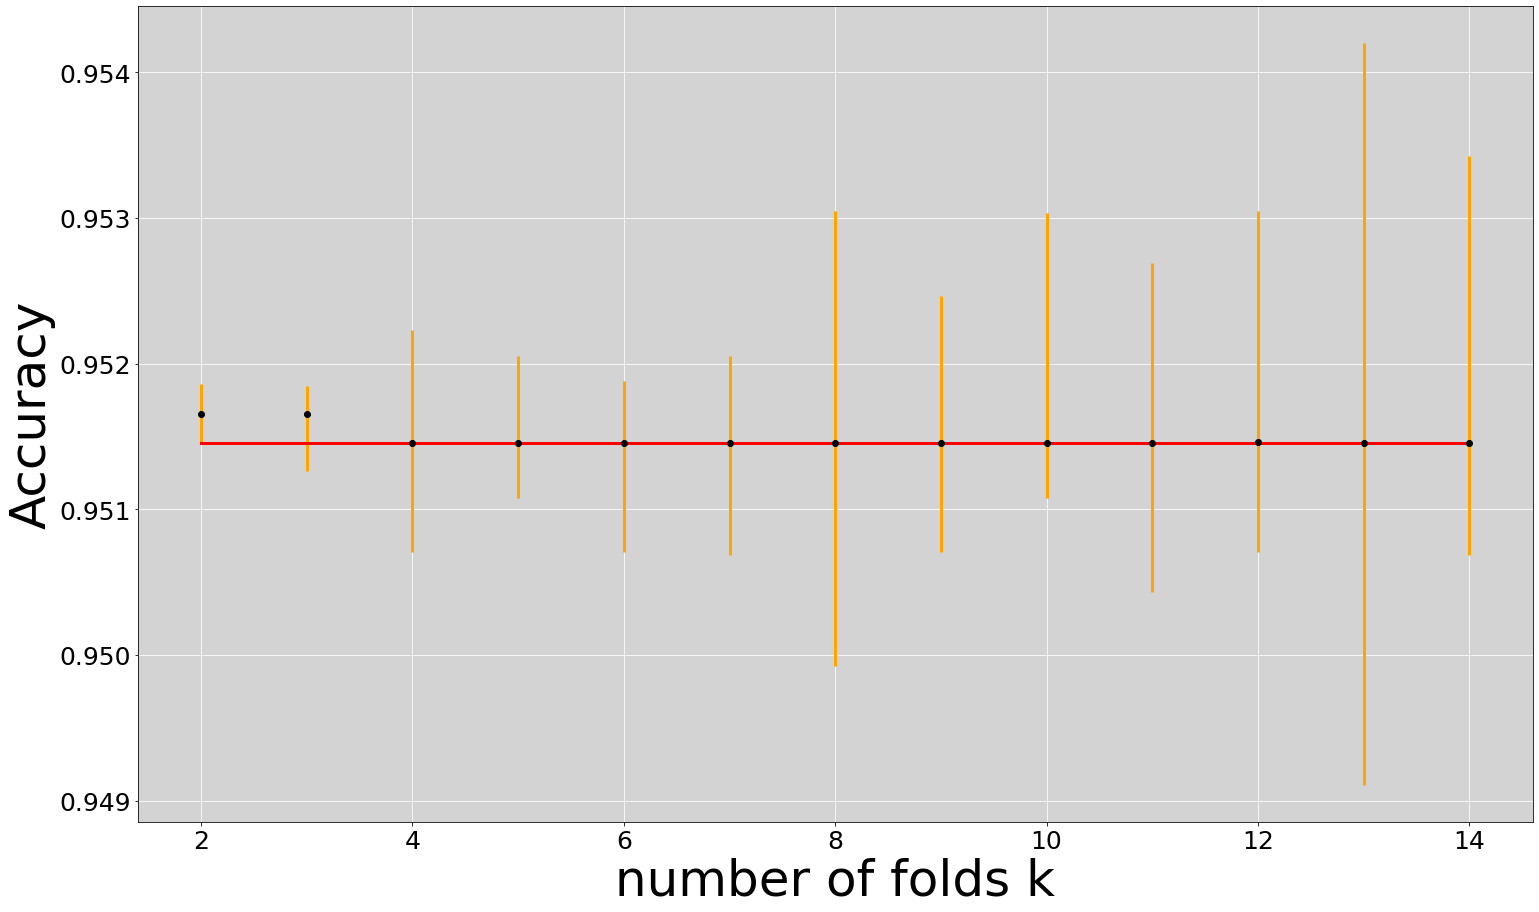

In [124]:
# sensitivity analysis of k in k-fold cross-validation
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
 
#retrieve the model to be evaluate
def get_model():
	model = LogisticRegression()
	return model
 
# evaluate the model using a given test condition
def evaluate_model(cv, X, y):
	# get the dataset
	# get the model
	model = get_model()
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return mean(scores), scores.min(), scores.max()
 
# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut(), X_big_array, y.array)

# define folds to test
folds = range(2,15)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
	# define the test condition
	cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=123)
	# evaluate k value
	k_mean, k_min, k_max = evaluate_model(cv, X_big_array, y.array)
	# store mean accuracy
	means.append(k_mean)
	# store min and max relative to the mean
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)
    
plt.rcParams['axes.facecolor'] = 'lightgray'
fig, ax = plt.subplots(1,1, figsize=(25,15))
ax.grid(color="w")
# line plot of k mean values with min/max error bars
ax.errorbar(folds, means, yerr=[mins, maxs], fmt='o', color="k", ecolor="orange", elinewidth=3)
# plot the ideal case in a separate color
ax.plot(folds, [ideal for _ in range(len(folds))], color='r', linewidth=3.0)

plt.xlabel("number of folds k", fontsize=50)
plt.ylabel("Accuracy", fontsize=50)
plt.xticks(size = 25)
plt.yticks(size = 25)
# show the plot
fig.savefig("immages/errorbar.png", bbox_inches='tight')

In [131]:
# Implement k-Fold
import warnings
warnings.filterwarnings("ignore")

# List of metrics averages
MSE_values = []
accuracy_values = []

# List of tuples (k, MSE_medio_k_esimo, accuracy_medio_k_esimo)
final_values = []

min_degree = 1
max_degree = 5

k = 2
for degree in tqdm(range(min_degree, max_degree + 1)):
    kf = StratifiedKFold(n_splits=k, random_state=None, shuffle=True)

    for train_index, test_index in kf.split(X_big_array, y):
        X_train, X_test = X_big_array[train_index], X_big_array[test_index]
        y_train, y_test = y.array[train_index], y.array[test_index]

        # Transform with polyfit
        poly = PolynomialFeatures(degree = degree, interaction_only=False, include_bias=False)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        y_LR = apply_Logistic_Regression(X_tr=X_train_poly, y_tr=y_train, X_te=X_test_poly)

        MSE_values.append(mean_squared_error(y_test, y_LR))
        accuracy_values.append(accuracy_score(y_test, y_LR))
        # For each degree calculate the mean and add it
    mean_MSE = np.mean(MSE_values)
    mean_accuracy = np.mean(accuracy_values)
    final_values.append((k, degree, mean_MSE, mean_accuracy))
    # Risvuoto le liste
    MSE_values = []
    accuracy_values = []

100%|██████████| 5/5 [00:17<00:00,  3.47s/it]


[1, 2, 3, 4, 5] [0.04952034106355557, 0.052652146128937836, 0.06361265931802614, 0.07026804199544248, 0.07066035090192738]


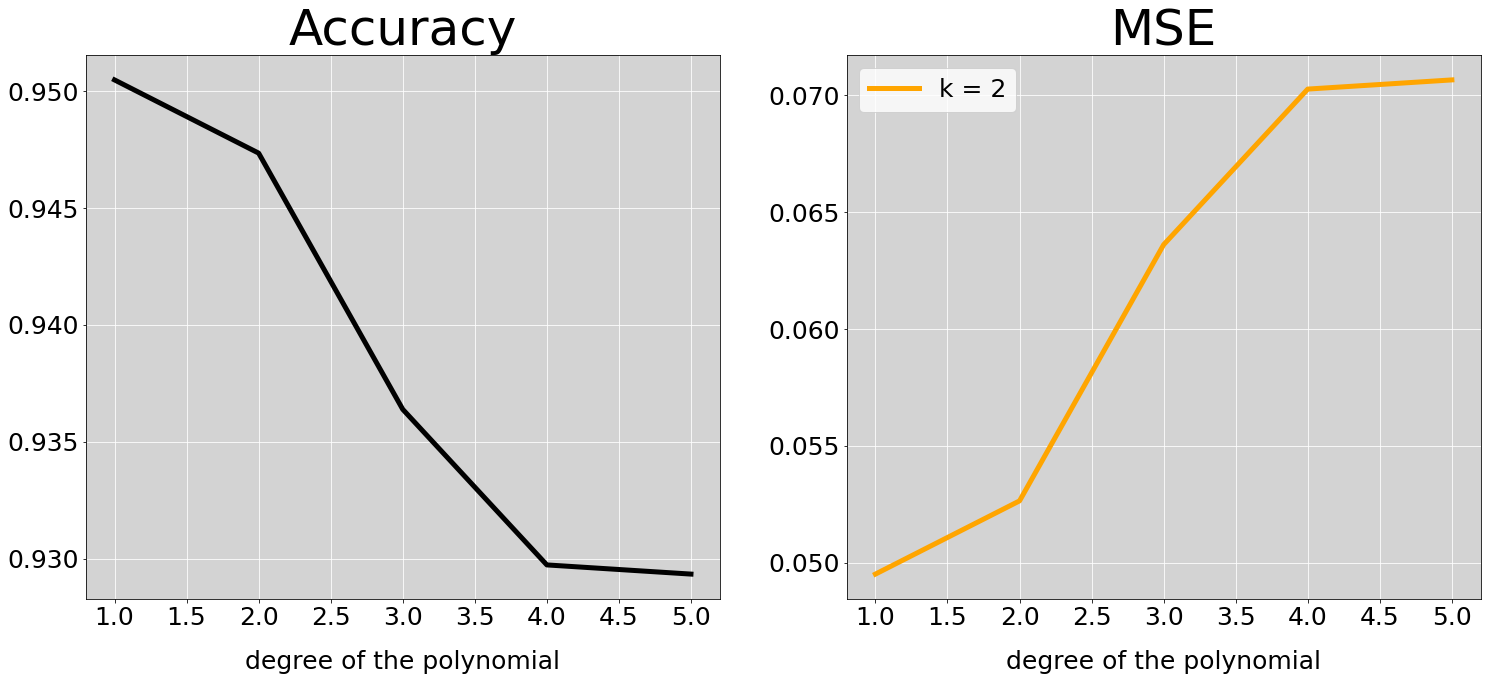

In [132]:
fig, axs = plt.subplots(1,2, figsize=(25, 10))
#fig.suptitle('Accuracy --> Left, MSE --> Right')

# Lists with values
x_values = [tupla[1] for tupla in final_values]
mse_plot =  [tupla[2] for tupla in final_values]
accuracy_plot =  [tupla[3] for tupla in final_values]

print(x_values, mse_plot)

# Plot the accuracy
axs[0].plot(x_values[0:max_degree], accuracy_plot[0:max_degree], color="k", linewidth = 5)
axs[0].set_title("Accuracy", fontsize=50)
axs[0].set_xlabel("degree of the polynomial", labelpad=20, fontsize=25)
axs[0].grid(color="w")

for tick in axs[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(25) 
for tick in axs[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(25) 



# Plot the MSE
axs[1].plot(x_values[0:max_degree], mse_plot[0:max_degree], color="orange", linewidth = 5)
axs[1].set_title("MSE", fontsize=50)
axs[1].set_xlabel("degree of the polynomial", labelpad=20, fontsize=25)
axs[1].grid(color="w")


for tick in axs[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(25) 
for tick in axs[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(25) 


# Legend
legend_list = []

plt.legend([str('k = ' + str(k))], loc='upper left', fontsize = 25, facecolor = "w")

plt.savefig("immages/accuracy_mse.png")